In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('titanic.csv')

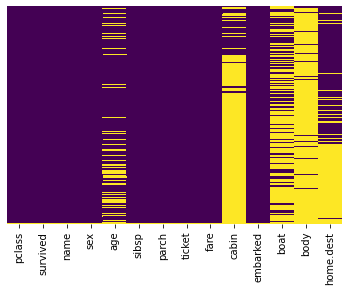

In [15]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='viridis' )

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
      if Pclass == 1:
        return 37
      elif Pclass == 2:
        return 29
      else:
          return 24
    else:
        return Age

In [17]:
df['age'] = df[['age', 'pclass']].apply(impute_age, axis=1)

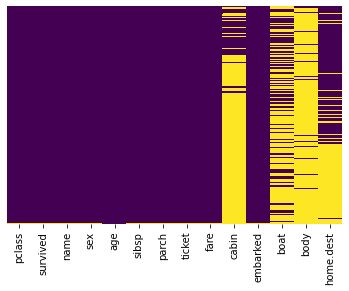

In [18]:
sns.heatmap(df.isnull(), yticklabels = False, cbar=False, cmap='viridis' )

In [19]:
df.drop('cabin', axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1310 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   embarked   1307 non-null   object 
 10  boat       486 non-null    object 
 11  body       121 non-null    float64
 12  home.dest  745 non-null    object 
dtypes: float64(7), object(6)
memory usage: 133.2+ KB


In [21]:
sex = pd.get_dummies(df['sex'], drop_first=True)
embark = pd.get_dummies(df['embarked'], drop_first=True)

In [22]:
df.drop(['sex', 'embarked', 'name', 'ticket'], axis=1, inplace=True)			

In [28]:
df.drop(['fare', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

In [24]:
df = pd.concat([df, sex, embark],axis=1)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis=1),
                                                    df['survived'], test_size=30,
                                                    random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [33]:
df.dropna(inplace=True)